In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
df_1 = pd.read_csv('../data/data_3__.csv')
df_1 = df_1.drop(['index'],axis=1)

In [3]:
df_1['data'] = pd.to_datetime(df_1['data'])
df_1.set_index('data', inplace=True)

In [4]:
df_1.head()

,valor
data,
2018-08-21,3914.55
2018-08-22,3713.02
2018-08-23,8001.75
2018-08-24,11312.95
2018-08-25,15230.01


In [5]:
month_data = df_1.resample('M').sum()

In [6]:
month_data

,valor
data,
2018-08-31,83050.67
2018-09-30,296706.28
2018-10-31,275052.14


In [7]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [8]:
df = month_data.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-08-31,83050.67
1,2018-09-30,296706.28
2,2018-10-31,275052.14


In [9]:
prediction_size = 1
train_df = df[:-prediction_size]

In [10]:
m = Prophet()
m.fit(train_df)

In [11]:
future = m.make_future_dataframe(periods=1)

forecast = m.predict(future)

In [12]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-08-31,83050.670000,83050.670000,83050.670000,83050.670000,83050.670000,0.0,0.0,0.0,0.0,0.0,0.0,83050.670000
1,2018-09-30,296706.280000,296706.280000,296706.280000,296706.280000,296706.280000,0.0,0.0,0.0,0.0,0.0,0.0,296706.280000
2,2018-10-01,303828.133667,303828.133667,303828.133667,303828.133667,303828.133667,0.0,0.0,0.0,0.0,0.0,0.0,303828.133667


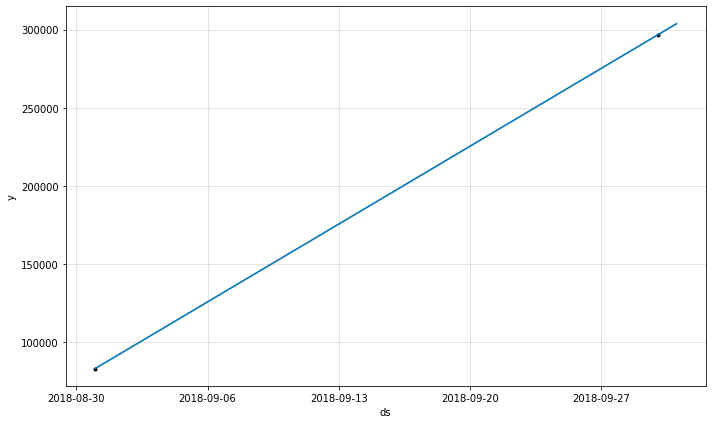

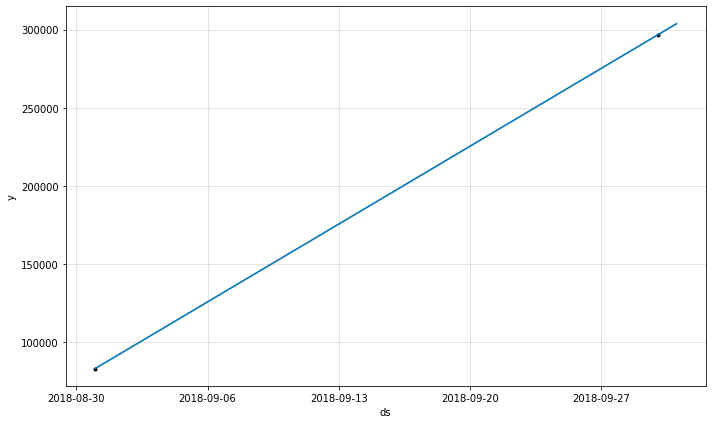

In [13]:
m.plot(forecast)

In [14]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [15]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df = cmp_df.dropna()

In [16]:
print('MAE:', metrics.mean_absolute_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))  
print('MSE:', metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:]))
print('RMSE:', np.sqrt(metrics.mean_squared_error(cmp_df.y[-prediction_size:],cmp_df.yhat[-prediction_size:])))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


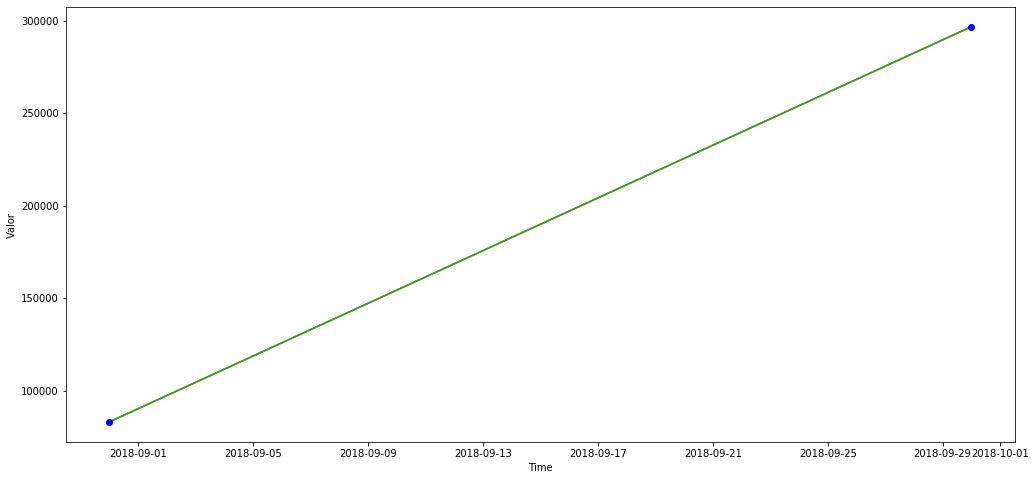

In [17]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df['yhat'])
plt.plot(cmp_df['yhat_lower'])
plt.plot(cmp_df['yhat_upper'])
plt.plot(cmp_df['y'],'bo')
plt.xlabel('Time')
plt.ylabel('Valor')
plt.grid(False)
plt.show()